In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import requests
from urllib.parse import urlparse, quote
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)
sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False})

In [2]:
park_seoul = pd.read_csv('./data/서울시 주요 공원현황.csv', sep=',', encoding='cp949', index_col='공원번호')
park_seoul.head(1)

,공원명,공원개요,면적,개원일,주요시설,주요식물,안내도,오시는길,이용시참고사항,이미지,지역,공원주소,관리부서,전화번호,X좌표(GRS80TM),Y좌표(GRS80TM),X좌표(WGS84),Y좌표(WGS84),바로가기
공원번호,,,,,,,,,,,,,,,,,,,
1,남산도시자연공원,남산공원은 도심에 위치하여 서울시민에게 맑은 공기를 제공하는 자연휴식처이며 산책 꽃...,2896887㎡ 임 야 : 2454140㎡ 녹지대 및 기타시설 : 442747㎡,1968.9.10,기반시설 : 광장 45950㎡ 도로 108530㎡ 산책로 6.7㎞ (북측:3.7㎞/...,소나무 단풍 아카시아 상수리나무 등 191종 2881870주,http://parks.seoul.go.kr/upload/seditorMulti/2...,명동역(남산케이블카 와룡묘 서울애니메이션센터 방면) 도보 명동역 3번출구 → 퍼시픽...,남산공원 차량통행 금지안내 2005년 5월 1일부터 남산공원에 일반승용차 택시 통행...,http://parks.seoul.go.kr/file/info/view.do?fId...,중구,서울특별시 중구 삼일대로 231(예장동),서울특별시중부푸른도시사업소,02-3783-5900,198364.107,450395.554,126.990377,37.55014,http://parks.seoul.go.kr/template/sub/namsan.do


In [3]:
park_seoul = park_seoul[['공원명', '면적', '지역', '공원주소', '전화번호', 'X좌표(WGS84)', 'Y좌표(WGS84)']]
park_seoul.tail()

,공원명,면적,지역,공원주소,전화번호,X좌표(WGS84),Y좌표(WGS84)
공원번호,,,,,,,
1378,용마도시자연공원(사가정공원),109635㎡,중랑구,서울특별시 중랑구 면목7동 산50,02-2094-2993,127.095997,37.579762
1379,문화비축기지,140022㎡,마포구,서울특별시 마포구 증산로 87,02-376-8410,126.893245,37.571718
1380,경춘선숲길,211392㎡,NaN,노원구 공릉2동 산 82-2,02-2289-4012,127.076482,37.627077
1381,율현공원,157535㎡,강남구,서울특별시 강남구 율현동 밤고개로24길(율현동 56),02-459-9452,127.115594,37.472332
1382,서울로7017,NaN,중구,서울로7017,02-313-7017,NaN,NaN


In [4]:
key_fd = open('kakaomapkey.txt', mode='r')
kmap_key = key_fd.read(100)
key_fd.close()

In [5]:
park_seoul['공원명'][1]

'남산도시자연공원'

In [6]:
url = 'https://dapi.kakao.com/v2/local/geo/coord2address.json?' + 'x=127.095997&y=37.579762'
result = requests.get(url,
        headers={"Authorization": "KakaoAK "+kmap_key}).json()
result['documents'][0]['address']['address_name']

'서울 중랑구 면목동 산 50-23'

In [7]:
url = 'https://dapi.kakao.com/v2/local/geo/coord2address.json?' + 'x=37.579762&y=127.095997'
result = requests.get(url,
        headers={"Authorization": "KakaoAK "+kmap_key}).json()
result

{'meta': {'total_count': 0}, 'documents': []}

In [8]:
# 주소바꾸기
new_addr = []
for i in park_seoul.index:
    try:
        # 1차시도 : 주소로검색
        url = 'https://dapi.kakao.com/v2/local/search/address.json?query=' + quote(park_seoul["공원주소"][i])
        result = requests.get(url,
                headers={"Authorization": "KakaoAK "+kmap_key}).json()
        addr = result['documents'][0]['address_name']
        new_addr.append(addr)
    except:
        try:
            # 2차시도 : 공원명으로검색
            url = 'https://dapi.kakao.com/v2/local/search/keyword.json?query=' + quote(park_seoul['공원명'][i])
            result = requests.get(url,
                    headers={"Authorization": "KakaoAK "+kmap_key}).json()
            addr = result['documents'][0]['address_name']
            new_addr.append(addr)
        except:
            try:
                # 3차시도 : 좌표로 검색
                url = "https://dapi.kakao.com/v2/local/geo/coord2address.json?" + f'x={park_seoul["X좌표(WGS84)"][i]}&y={park_seoul["Y좌표(WGS84)"][i]}&input_coord=WGS84'
                result = requests.get(url,
                        headers={"Authorization": "KakaoAK "+kmap_key}).json()
                addr = result['documents'][0]['address']['address_name']
                new_addr.append(addr)
            except:
                print(i, park_seoul['공원명'][i])

In [9]:
# 구 또는 시로 뽑아내기
addr_list = []
for i in range(len(new_addr)):
    addr = new_addr[i].split(' ')[1]
    addr_list.append(addr)
len(addr_list)

132

In [10]:
# 지역내용 바꾸기
park_seoul['지역'] = addr_list
park_seoul.tail()

,공원명,면적,지역,공원주소,전화번호,X좌표(WGS84),Y좌표(WGS84)
공원번호,,,,,,,
1378,용마도시자연공원(사가정공원),109635㎡,중랑구,서울특별시 중랑구 면목7동 산50,02-2094-2993,127.095997,37.579762
1379,문화비축기지,140022㎡,마포구,서울특별시 마포구 증산로 87,02-376-8410,126.893245,37.571718
1380,경춘선숲길,211392㎡,노원구,노원구 공릉2동 산 82-2,02-2289-4012,127.076482,37.627077
1381,율현공원,157535㎡,강남구,서울특별시 강남구 율현동 밤고개로24길(율현동 56),02-459-9452,127.115594,37.472332
1382,서울로7017,NaN,중구,서울로7017,02-313-7017,NaN,NaN


In [11]:
# 주소 바꾸기
park_seoul['공원주소'] = new_addr
park_seoul.tail()

,공원명,면적,지역,공원주소,전화번호,X좌표(WGS84),Y좌표(WGS84)
공원번호,,,,,,,
1378,용마도시자연공원(사가정공원),109635㎡,중랑구,서울 중랑구 면목동 산 50-23,02-2094-2993,127.095997,37.579762
1379,문화비축기지,140022㎡,마포구,서울 마포구 증산로 87,02-376-8410,126.893245,37.571718
1380,경춘선숲길,211392㎡,노원구,서울 노원구 공릉동,02-2289-4012,127.076482,37.627077
1381,율현공원,157535㎡,강남구,서울 강남구 밤고개로24길 56,02-459-9452,127.115594,37.472332
1382,서울로7017,NaN,중구,서울 중구 봉래동2가 122-16,02-313-7017,NaN,NaN


In [13]:
url = 'https://dapi.kakao.com/v2/local/search/keyword.json?query=' + quote('아차산생태공원')
result = requests.get(url,
        headers={"Authorization": "KakaoAK "+kmap_key}).json()
result['documents'][0]

{'address_name': '서울 광진구 광장동 370',
 'category_group_code': '',
 'category_group_name': '',
 'category_name': '여행 > 공원 > 도시근린공원',
 'distance': '',
 'id': '12630966',
 'phone': '02-450-1192',
 'place_name': '아차산생태공원',
 'place_url': 'http://place.map.kakao.com/12630966',
 'road_address_name': '',
 'x': '127.100800735849',
 'y': '37.5517166336474'}

In [14]:
# 좌표바꾸기
lat_list = []; lng_list = []
for i in park_seoul.index:
    try:
        url = 'https://dapi.kakao.com/v2/local/search/keyword.json?query=' + quote(park_seoul['공원명'][i])
        result = requests.get(url,
                headers={"Authorization": "KakaoAK "+kmap_key}).json()
        addr = result['documents'][0]['address_name']
        lat = float(result['documents'][0]['y'])
        lng = float(result['documents'][0]['x'])
        lat_list.append(lat)
        lng_list.append(lng)
    except:
        url = 'https://dapi.kakao.com/v2/local/search/address.json?query=' + quote(park_seoul['공원주소'][i])
        result = requests.get(url,
                headers={"Authorization": "KakaoAK "+kmap_key}).json()
        lat = float(result['documents'][0]['y'])
        lng = float(result['documents'][0]['x'])
        lat_list.append(lat)
        lng_list.append(lng)

In [15]:
park_seoul['lat']=lat_list; park_seoul['lng']=lng_list
park_seoul.tail()

,공원명,면적,지역,공원주소,전화번호,X좌표(WGS84),Y좌표(WGS84),lat,lng
공원번호,,,,,,,,,
1378,용마도시자연공원(사가정공원),109635㎡,중랑구,서울 중랑구 면목동 산 50-23,02-2094-2993,127.096,37.5798,37.579734,127.096202
1379,문화비축기지,140022㎡,마포구,서울 마포구 증산로 87,02-376-8410,126.893,37.5717,37.571076,126.894237
1380,경춘선숲길,211392㎡,노원구,서울 노원구 공릉동,02-2289-4012,127.076,37.6271,37.620692,127.078706
1381,율현공원,157535㎡,강남구,서울 강남구 밤고개로24길 56,02-459-9452,127.116,37.4723,37.472680,127.115483
1382,서울로7017,0,중구,서울 중구 봉래동2가 122-16,02-313-7017,0,0,37.556621,126.970298


In [16]:
del park_seoul['X좌표(WGS84)']
del park_seoul['Y좌표(WGS84)']

park_seoul.tail()

,공원명,면적,지역,공원주소,전화번호,lat,lng
공원번호,,,,,,,
1378,용마도시자연공원(사가정공원),109635㎡,중랑구,서울 중랑구 면목동 산 50-23,02-2094-2993,37.579734,127.096202
1379,문화비축기지,140022㎡,마포구,서울 마포구 증산로 87,02-376-8410,37.571076,126.894237
1380,경춘선숲길,211392㎡,노원구,서울 노원구 공릉동,02-2289-4012,37.620692,127.078706
1381,율현공원,157535㎡,강남구,서울 강남구 밤고개로24길 56,02-459-9452,37.472680,127.115483
1382,서울로7017,0,중구,서울 중구 봉래동2가 122-16,02-313-7017,37.556621,126.970298


In [17]:
park_seoul['공원명'][1378]

'용마도시자연공원(사가정공원)'

In [18]:
# 면적바꾸기 = 면적이 제대로 적혀있지않은것은 0처리
park_seoul['면적'] = park_seoul['면적'].str.replace(' ', '')
park_seoul['면적'] = park_seoul['면적'].str.replace('총', '')
park_seoul.head()

,공원명,면적,지역,공원주소,전화번호,lat,lng
공원번호,,,,,,,
1,남산도시자연공원,2896887㎡임야:2454140㎡녹지대및기타시설:442747㎡,중구,서울 중구 삼일대로 231,02-3783-5900,37.552498,126.989317
3,길동생태공원,80683㎡,강동구,서울 강동구 천호대로 1291,02-489-2770,37.540820,127.155420
4,서울대공원,9132690m²,과천시,경기 과천시 대공원광장로 102,02-500-7032,37.426932,127.019902
5,서울숲,480994㎡,성동구,서울 성동구 뚝섬로 273,02-460-2905,37.544322,127.037618
6,월드컵공원,2284085㎡,마포구,서울 마포구 하늘공원로 84,02-300-5500,37.563194,126.897635


In [19]:
park_seoul['면적'] = park_seoul['면적'].str.replace('㎡', ' ')
park_seoul['면적'] = park_seoul['면적'].str.replace('m²', ' ')
park_seoul['면적'] = park_seoul['면적'].str.replace('㎥', ' ')
park_seoul['면적'] = park_seoul['면적'].str.replace('m2', ' ')
park_seoul.head()

,공원명,면적,지역,공원주소,전화번호,lat,lng
공원번호,,,,,,,
1,남산도시자연공원,2896887 임야:2454140 녹지대및기타시설:442747,중구,서울 중구 삼일대로 231,02-3783-5900,37.552498,126.989317
3,길동생태공원,80683,강동구,서울 강동구 천호대로 1291,02-489-2770,37.540820,127.155420
4,서울대공원,9132690,과천시,경기 과천시 대공원광장로 102,02-500-7032,37.426932,127.019902
5,서울숲,480994,성동구,서울 성동구 뚝섬로 273,02-460-2905,37.544322,127.037618
6,월드컵공원,2284085,마포구,서울 마포구 하늘공원로 84,02-300-5500,37.563194,126.897635


In [20]:
area_list = []
for i in park_seoul.index:
    area = park_seoul['면적'][i]
    area_list.append(area)
print(area_list)

['2896887 임야:2454140 녹지대및기타시설:442747 ', '80683 ', '9132690 ', '480994 ', '2284085 ', '8948.1 ', '휴양및편익시설:평의자7개화장실23.18 조경시설-은하폭포(높이12m×폭10m발원지로부터17.3m폭1.5~10m수조255 담수량140t)-산성폭포(높이5m×폭12m수조90 담수량75t)-명속의벽1개소(높이5.4m)교양시설:야외공연무대102 관리시설:관리실8.55 전기실51.03 기계실83.36 안내판1개공원등18본휴양시설:벤취12개', '6456 ', '80309 배수지시설용량:201.000 송수펌프용량:직송급수계통30000 /일금호배수지계통16400 /일', '1980.4 ', '5197.7 ', '11467 ', '229539 ', '15179.7 ', '16734.60 ', '61544 녹지대:40792 광장:6600 기타:14152 ', '424106 ', '560552 ', '26696.8 ', '75900 ', '113021.7 ', '201779 ', '258991 ', '10420819.08 ', '171294.1 ', '15000 ', '297926 ', '411972 ', '98470 ', '2038741.3 ', '603715.2 ', '108120 ', '29619.3 ', '29843.8 ', '126026 ', '135002.7 ', '384026 ', '180000 ', '416031 ', '160720 ', '2277252 ', '19599.70 ', '138596 ', '185295 ', '254648 ', '29816.5 ', '762642 ', '664905 ', '99599.9 ', '5802 ', '16500 ', '585652 ', '649709.6 ', '72132 ', '66027.8 ', '265582 ', '2088704.9 ', '112070 ', '993724 ', '219167 곰두리체육센터:7370 (지하2층지상3층)송파도서관:8259 (

In [21]:
area_list[1].split()[0]

'80683'

In [22]:
n_area_list = []
for i in range(len(area_list)):
    n_area_list.append(area_list[i].split()[0])
print(n_area_list)

['2896887', '80683', '9132690', '480994', '2284085', '8948.1', '휴양및편익시설:평의자7개화장실23.18', '6456', '80309', '1980.4', '5197.7', '11467', '229539', '15179.7', '16734.60', '61544', '424106', '560552', '26696.8', '75900', '113021.7', '201779', '258991', '10420819.08', '171294.1', '15000', '297926', '411972', '98470', '2038741.3', '603715.2', '108120', '29619.3', '29843.8', '126026', '135002.7', '384026', '180000', '416031', '160720', '2277252', '19599.70', '138596', '185295', '254648', '29816.5', '762642', '664905', '99599.9', '5802', '16500', '585652', '649709.6', '72132', '66027.8', '265582', '2088704.9', '112070', '993724', '219167', '1349556.4', '1511198', '1097565', '328018', '1447122', '207790', '1018689', '954553', '1667848', '13224', '130345', '5332422', '5107964', '47832', '213552', '168099.87', '359435.2', '36660', '380735', '1807420.9', '359342.8', '632733', '328018', '6691885.3', '285757', '110407', '29682.2', '137759', '917190', '51470', '662543', '217946', '179666', '34955', '1

In [23]:
n2_area_list=[]
for n in range(len(n_area_list)):
    if len(n_area_list[n]) > 15:
        n2_area_list.append('0')
    else:
        n2_area_list.append(n_area_list[n])
print(n2_area_list)

['2896887', '80683', '9132690', '480994', '2284085', '8948.1', '0', '6456', '80309', '1980.4', '5197.7', '11467', '229539', '15179.7', '16734.60', '61544', '424106', '560552', '26696.8', '75900', '113021.7', '201779', '258991', '10420819.08', '171294.1', '15000', '297926', '411972', '98470', '2038741.3', '603715.2', '108120', '29619.3', '29843.8', '126026', '135002.7', '384026', '180000', '416031', '160720', '2277252', '19599.70', '138596', '185295', '254648', '29816.5', '762642', '664905', '99599.9', '5802', '16500', '585652', '649709.6', '72132', '66027.8', '265582', '2088704.9', '112070', '993724', '219167', '1349556.4', '1511198', '1097565', '328018', '1447122', '207790', '1018689', '954553', '1667848', '13224', '130345', '5332422', '5107964', '47832', '213552', '168099.87', '359435.2', '36660', '380735', '1807420.9', '359342.8', '632733', '328018', '6691885.3', '285757', '110407', '29682.2', '137759', '917190', '51470', '662543', '217946', '179666', '34955', '18083', '4835', '1965

In [24]:
park_seoul['면적'] = n2_area_list
park_seoul.head()

,공원명,면적,지역,공원주소,전화번호,lat,lng
공원번호,,,,,,,
1,남산도시자연공원,2896887,중구,서울 중구 삼일대로 231,02-3783-5900,37.552498,126.989317
3,길동생태공원,80683,강동구,서울 강동구 천호대로 1291,02-489-2770,37.540820,127.155420
4,서울대공원,9132690,과천시,경기 과천시 대공원광장로 102,02-500-7032,37.426932,127.019902
5,서울숲,480994,성동구,서울 성동구 뚝섬로 273,02-460-2905,37.544322,127.037618
6,월드컵공원,2284085,마포구,서울 마포구 하늘공원로 84,02-300-5500,37.563194,126.897635


In [27]:
park_seoul = park_seoul.astype({'면적':'float'})
park_seoul.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132 entries, 1 to 1382
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   공원명     132 non-null    object 
 1   면적      132 non-null    float64
 2   지역      132 non-null    object 
 3   공원주소    132 non-null    object 
 4   전화번호    132 non-null    object 
 5   lat     132 non-null    float64
 6   lng     132 non-null    float64
dtypes: float64(3), object(4)
memory usage: 8.2+ KB


#### 1. 지역별 공원수

In [48]:
num_one = park_seoul.groupby(park_seoul['지역']).count()
num_one.head()

,공원명,면적,공원주소,전화번호,lat,lng
지역,,,,,,
강남구,7,7,7,7,7,7
강동구,7,7,7,7,7,7
강북구,3,3,3,3,3,3
강서구,9,9,9,9,9,9
고양시,1,1,1,1,1,1


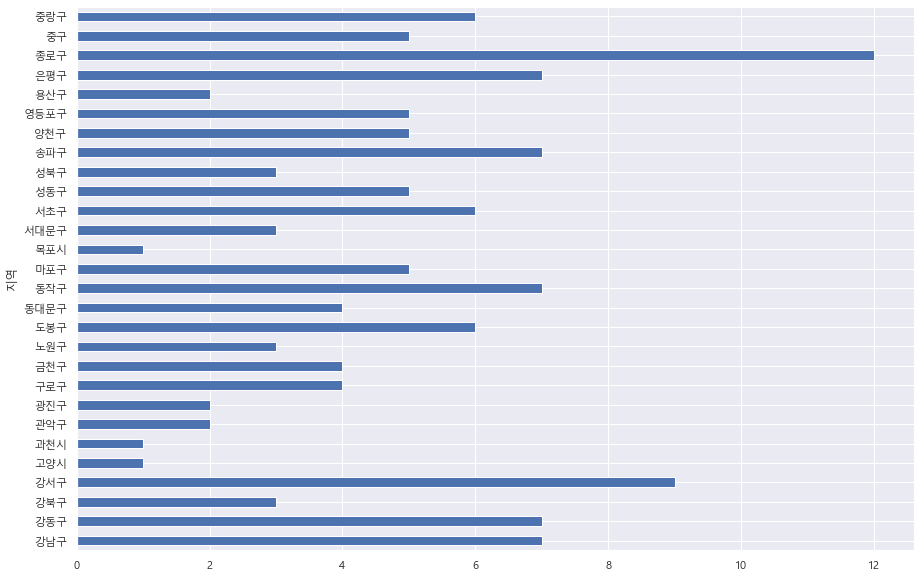

In [47]:
num_one['공원명'].plot(kind='barh', grid=True, figsize=(15,10))
plt.show()

#### 2. 구 인구별 공원 면적

In [50]:
pop_seoul = pd.read_csv('./data/서울시 인구현황.txt', sep='\t', encoding='utf8', header=2)
pop_seoul.head()

,기간,자치구,세대,계,남자,여자,계.1,남자.1,여자.1,계.2,남자.2,여자.2,세대당인구,65세이상고령자
0,2020.3/4,합계,"4,405,833","9,953,009","4,840,912","5,112,097","9,699,232","4,719,170","4,980,062","253,777","121,742","132,035",2.20,"1,552,356"
1,2020.3/4,종로구,"74,861","159,842","77,391","82,451","149,952","73,024","76,928","9,890","4,367","5,523",2.00,"28,396"
2,2020.3/4,중구,"63,594","135,321","66,193","69,128","125,800","61,526","64,274","9,521","4,667","4,854",1.98,"24,265"
3,2020.3/4,용산구,"112,451","244,953","119,074","125,879","229,786","110,604","119,182","15,167","8,470","6,697",2.04,"39,995"
4,2020.3/4,성동구,"136,096","302,695","147,582","155,113","295,591","144,444","151,147","7,104","3,138","3,966",2.17,"45,372"


#### 3. 공원 면적 vs 구 면적

#### 4. 공원 지도에 표시하기(공원 크기가 차이가 나도록)

#### 5.강서구 지도에 공원 자세히 표시하기